In [134]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Эксперимент

## Определение входных данных

Масса тела $m$; \\
Расстояние от оси вращения до центра масс $l$; \\
Момент инерции $I$ тела; \\
Ускорение свободного падения $g = 9.82 м/с^2$; \\
Коэффициент лобового сопротивления $r$; \\

Начальный угол отклонения $\varphi_0$; \\
Угол застоя $\Delta \varphi_з$; \\

In [135]:
def run(m, l, I, phi_0, delta_t=0.01, g=9.82, r=0, delta_phi=0, time_max=50):
  # Постоянные
  beta = r*(l**2)/(2*I)
  w_0_squared = m*g*l/I
  sin_delta_phi = sin(delta_phi)

  print(f"beta: {beta} \nw_0 в квадрате: {w_0_squared} \nsin(delta_phi): {sin_delta_phi}")

  # Функции
  f = lambda W: W;
  psi = lambda Phi, W: -2*beta*W - w_0_squared*sin(Phi) + w_0_squared*sin_delta_phi*np.sign(-W)


  # Начальные данные
  t = 0
  phi = phi_0
  w = 0
  A = l*sin(phi)


  # Таблицы для хранения данных
  phi_t = pd.DataFrame({'t': [t], 'phi': [phi]})
  omega_t = pd.DataFrame({'t': [t], 'w': [w]})
  A_t = pd.DataFrame({'t': [t], 'A': [A]})


  while phi > delta_phi or abs(w) > 0.05 or t < time_max:
    phi_prev = phi
    w_prev = w
    
    t = t + delta_t
    
    pseudo_new_phi = phi + delta_t*f(w)
    pseudo_new_w = w + delta_t*psi(phi, w)

    phi = phi_prev + delta_t/2*(f(w) + f(pseudo_new_w))
    w = w_prev + delta_t/2*(psi(phi_prev, w_prev) + psi(pseudo_new_phi, pseudo_new_w))
    
    #phi = pseudo_new_phi
    #w = pseudo_new_w

    A = l*sin(phi)

    phi_t = phi_t.append({'t': t, 'phi': phi}, ignore_index=True)
    omega_t = omega_t.append({'t': t, 'w': w}, ignore_index=True)
    A_t = A_t.append({'t': t, 'A': A}, ignore_index=True)

    if (t > time_max):
      break

  return phi_t, omega_t, A_t


In [136]:
phi_t_no_res, omega_t_no_res, A_t_no_res = run(5, 1, 5, -np.pi/3, time_max=20) # данные, соответствующие математическому маятнику при отклонении -60 градусов

phi_t_no_res.head()

beta: 0.0 
w_0 в квадрате: 9.82 
sin(delta_phi): 0.0


,t,phi
0,0.00,-1.047198
1,0.01,-1.046772
2,0.02,-1.045497
3,0.03,-1.043372
4,0.04,-1.040398


## Математический маятник

### Графики для математического маятника без сил сопротивления

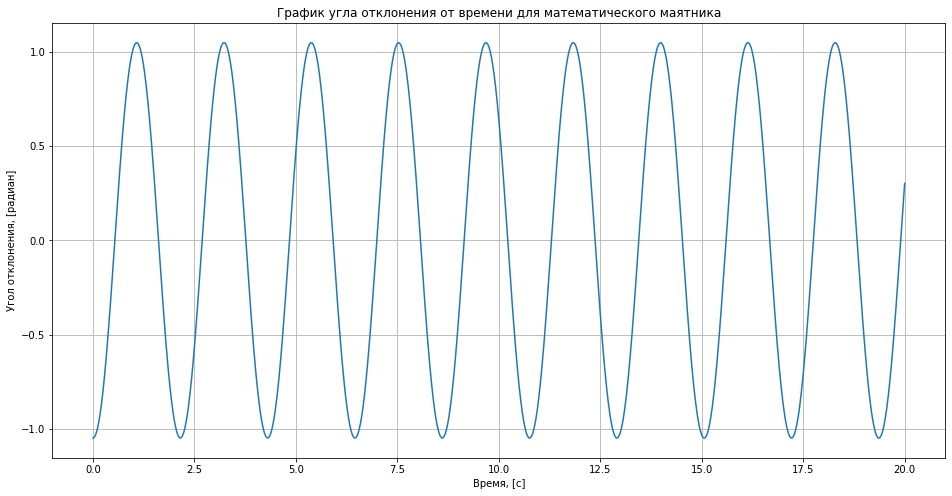

In [137]:
t = phi_t_no_res['t']
phi = phi_t_no_res['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t, phi)
ax.grid()
plt.title("График угла отклонения от времени для математического маятника")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.show()

beta: 0.0 
w_0 в квадрате: 9.82 
sin(delta_phi): 0.0


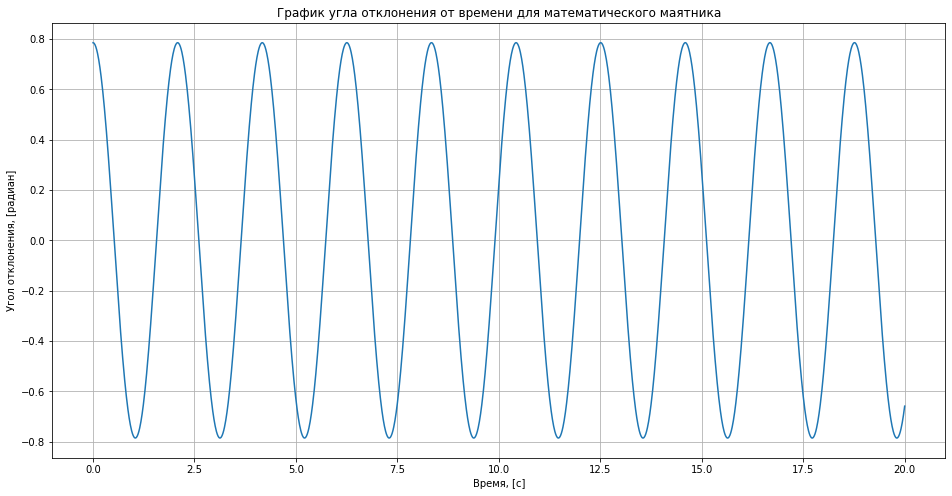

In [138]:
phi_t, omega_t, A_t = run(5, 1, 5, np.pi/4, time_max=20) # данные, соответствующие математическому маятнику при отклонении 45 градусов
t = phi_t['t']
phi = phi_t['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t, phi)
ax.grid()
plt.title("График угла отклонения от времени для математического маятника")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.show()


### Графики математического маятника с вязким трением


beta: 0.03 
w_0 в квадрате: 9.82 
sin(delta_phi): 0.0


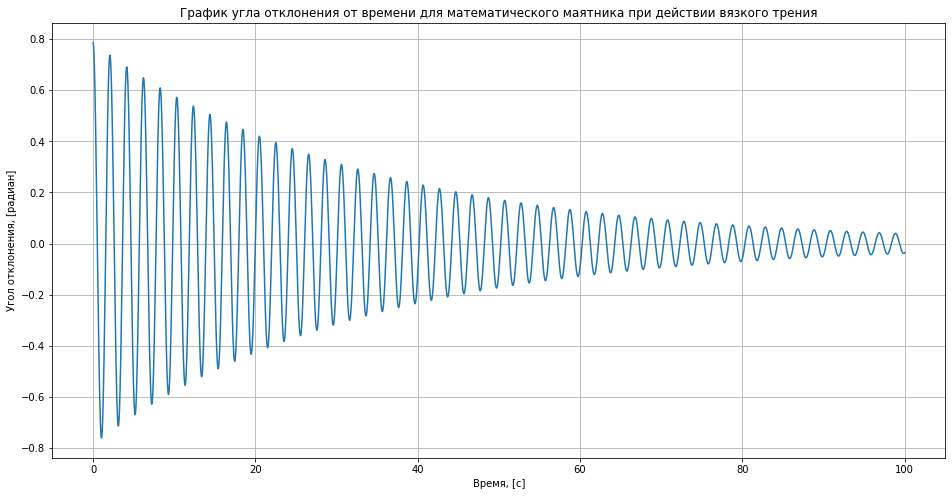

In [139]:
phi_t_visc, omega_t_visc, A_t_visc = run(5, 1, 5, np.pi/4, r=0.3, time_max=100) # данные, соответствующие математическому маятнику при отклонении 45 градусов
t = phi_t_visc['t']
phi = phi_t_visc['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t, phi)
ax.grid()
plt.title("График угла отклонения от времени для математического маятника при действии вязкого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.show()


Видно, что амплитуда убывает экспоненциально

### График угла отклонения математического маятника с сухим трением


beta: 0.0 
w_0 в квадрате: 9.82 
sin(delta_phi): 0.01745240643728351


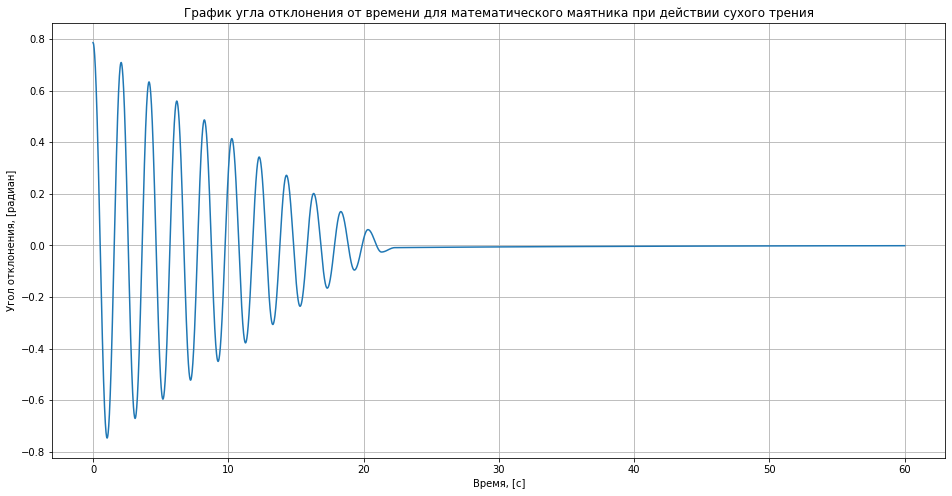

In [140]:
phi_t_dry, omega_t_dry, A_t_dry = run(5, 1, 5, np.pi/4, delta_phi=np.pi/180, time_max=60) # данные, соответствующие математическому маятнику при отклонении 45 градусов
t = phi_t_dry['t']
phi = phi_t_dry['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t, phi)
ax.grid()
plt.title("График угла отклонения от времени для математического маятника при действии сухого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.show()


Амплитуда убывает линейно, до тех пор, пока маятник не остановится

### График угла отклонения математического маятника при вязком и сухом трениях

beta: 0.03 
w_0 в квадрате: 9.82 
sin(delta_phi): 0.01745240643728351


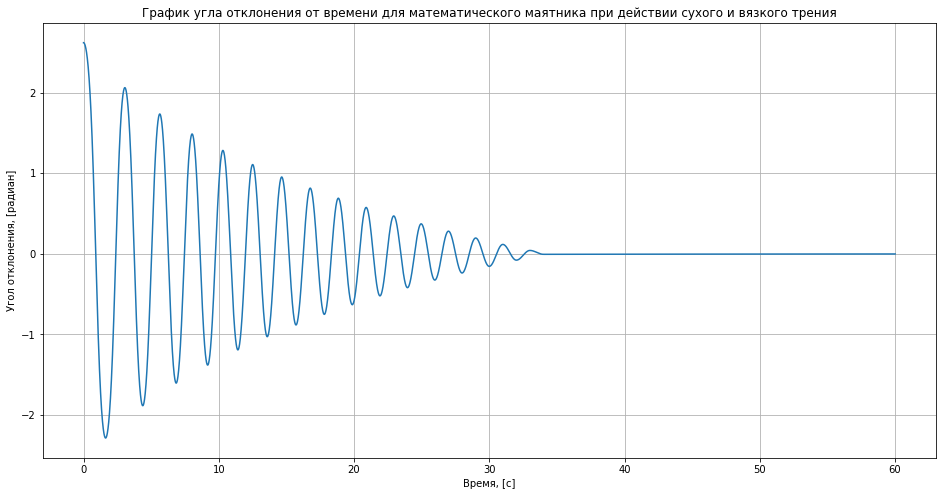

In [148]:
phi_t_visc_dry, omega_t_visc_dry, A_t_visc_dry = run(5, 1, 5, 5*np.pi/6, r=0.3, delta_phi=np.pi/180, time_max=60) # данные, соответствующие математическому маятнику при отклонении 45 градусов
t = phi_t_visc_dry['t']
phi = phi_t_visc_dry['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t, phi)
ax.grid()
plt.title("График угла отклонения от времени для математического маятника при действии сухого и вязкого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.show()

## Физический маятник
Момент инерции физического маятника, деленный на $ml^2$, больше единицы по теореме Штейнера

### Без моментов сопротивления


beta: 0.0 
w_0 в квадрате: 7.014285714285714 
sin(delta_phi): 0.0


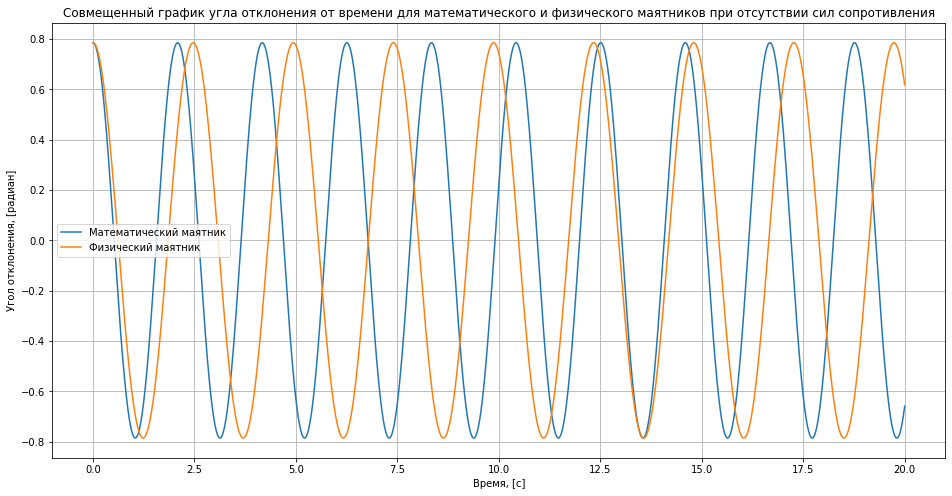

In [142]:
phi_t_phys, omega_t_phys, A_t_phys = run(5, 1, 7, np.pi/4, time_max=20) # данные, соответствующие математическому маятнику при отклонении 45 градусов
t_math = phi_t['t']
phi_math = phi_t['phi']

t_phys = phi_t_phys['t']
phi_phys = phi_t_phys['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t_math, phi_math, label="Математический маятник")
ax.plot(t_phys, phi_phys, label="Физический маятник")
ax.grid()
plt.title("Совмещенный график угла отклонения от времени для математического и физического маятников при отсутствии сил сопротивления")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.legend()
plt.show()

На графике видно, что у математического и физического маятников отличается период: он больше для физического маятника


### С вязким трением

beta: 0.02142857142857143 
w_0 в квадрате: 7.014285714285714 
sin(delta_phi): 0.0


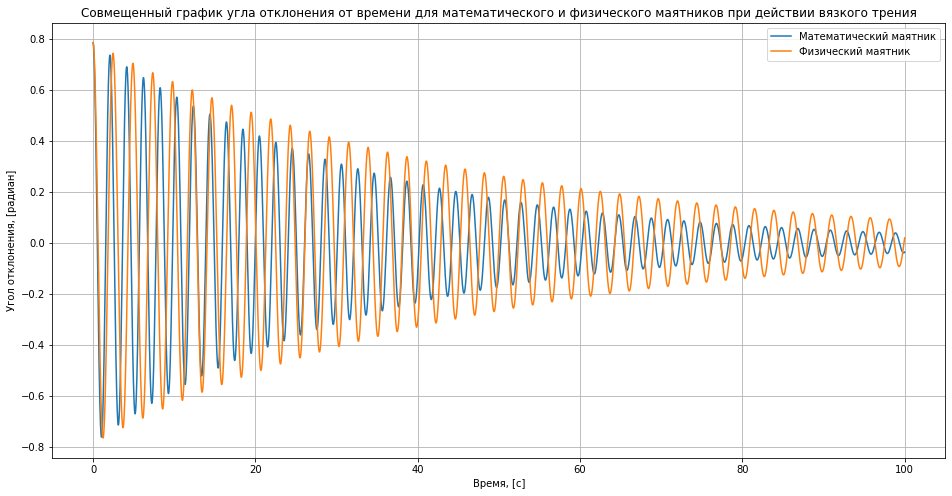

In [143]:
phi_t_visc_phys, omega_t_visc_phys, A_t_visc_phys = run(5, 1, 7, np.pi/4, r=0.3, time_max=100) 
t_math = phi_t_visc['t']
phi_math = phi_t_visc['phi']

t_phys = phi_t_visc_phys['t']
phi_phys = phi_t_visc_phys['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t_math, phi_math, label="Математический маятник")
ax.plot(t_phys, phi_phys, label="Физический маятник")
ax.grid()
plt.title("Совмещенный график угла отклонения от времени для математического и физического маятников при действии вязкого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.legend()
plt.show()

Амплитуда физического маятника убывает экспонециально. Однако при одинаковых начальных отклонениях на 100ой секунде амплитуда физического маятника в ~2 раза больше амплитуды математического. Скорее всего, это вызвано тем, что период физического маятника больше, как следствие, меньше угловая и линейная скорость, а значит и меньше по модулю сила вязкого трения

### С сухим трением

beta: 0.0 
w_0 в квадрате: 7.014285714285714 
sin(delta_phi): 0.01745240643728351


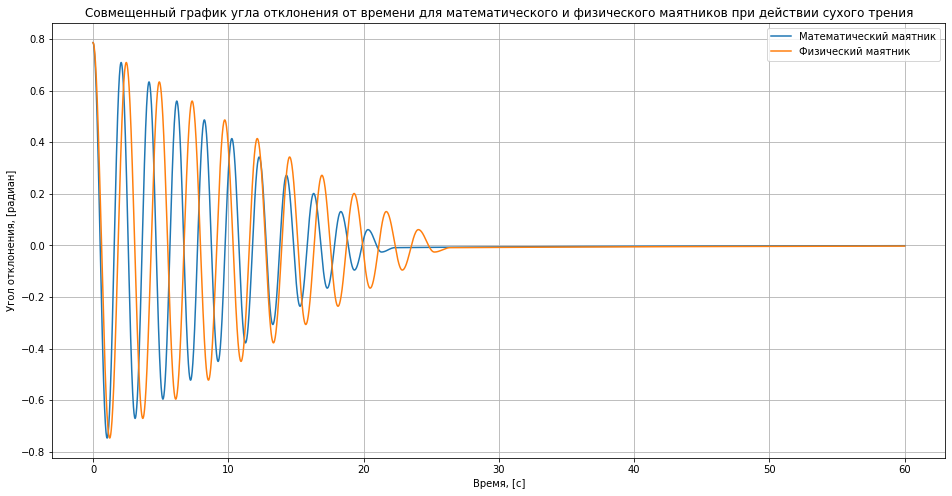

In [144]:
phi_t_dry_phys, omega_t_dry_phys, A_t_dry_phys = run(5, 1, 7, np.pi/4, delta_phi=np.pi/180, time_max=60) 
t_math = phi_t_dry['t']
phi_math = phi_t_dry['phi']

t_phys = phi_t_dry_phys['t']
phi_phys = phi_t_dry_phys['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t_math, phi_math, label="Математический маятник")
ax.plot(t_phys, phi_phys, label="Физический маятник")
ax.grid()
plt.title("Совмещенный график угла отклонения от времени для математического и физического маятников при действии сухого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.legend()
plt.show()

Ситуация аналогична предыдущей: меньше период, значит дольше продолжает колебания. Однако в отличии от колебаний при вязком трении, колебания при сухом трении в итоге завершаются.  

Стоит заметить, что математический и физический маятники совершили одинаковое число полных колебаний: 10

### С сухим и взяким трением

beta: 0.02142857142857143 
w_0 в квадрате: 7.014285714285714 
sin(delta_phi): 0.01745240643728351


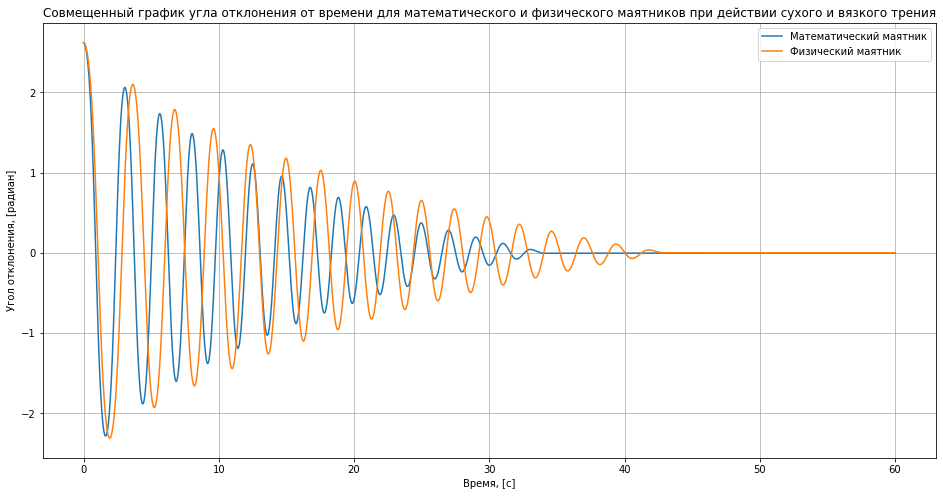

In [149]:
phi_t_visc_dry_phys, omega_t_visc_dry_phys, A_t_visc_dry_phys = run(5, 1, 7, 5*np.pi/6, r=0.3, delta_phi=np.pi/180, time_max=60) 
t_math = phi_t_visc_dry['t']
phi_math = phi_t_visc_dry['phi']

t_phys = phi_t_visc_dry_phys['t']
phi_phys = phi_t_visc_dry_phys['phi']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t_math, phi_math, label="Математический маятник")
ax.plot(t_phys, phi_phys, label="Физический маятник")
ax.grid()
plt.title("Совмещенный график угла отклонения от времени для математического и физического маятников при действии сухого и вязкого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угол отклонения, [радиан]")
plt.legend()
plt.show()

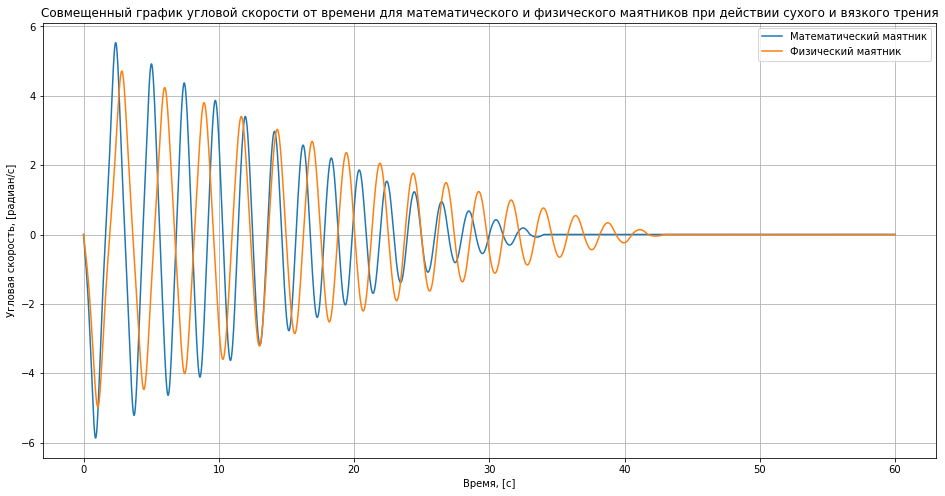

In [150]:
t_math = omega_t_visc_dry['t']
omega_math = omega_t_visc_dry['w']

t_phys = omega_t_visc_dry_phys['t']
omega_phys = omega_t_visc_dry_phys['w']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t_math, omega_math, label="Математический маятник")
ax.plot(t_phys, omega_phys, label="Физический маятник")
ax.grid()
plt.title("Совмещенный график угловой скорости от времени для математического и физического маятников при действии сухого и вязкого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Угловая скорость, [радиан/c]")
plt.legend()
plt.show()

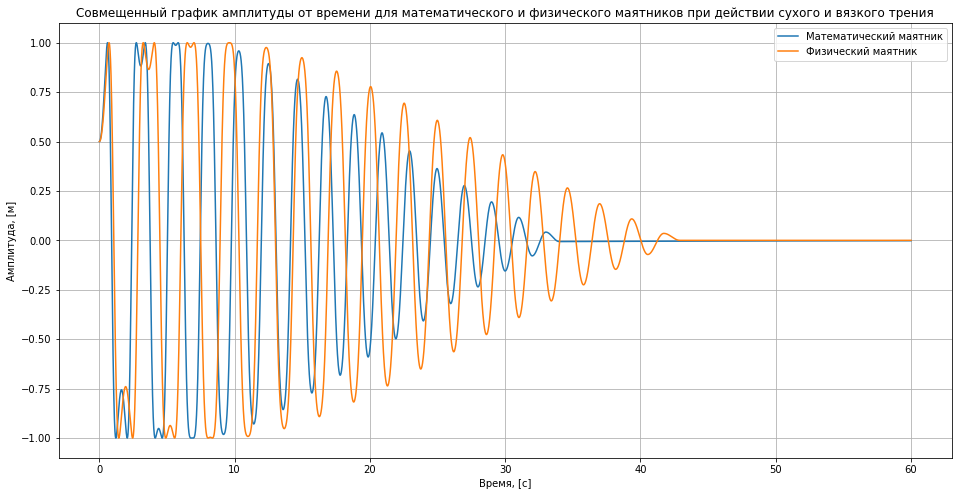

In [151]:
t_math = A_t_visc_dry['t']
A_math = A_t_visc_dry['A']

t_phys = A_t_visc_dry_phys['t']
A_phys = A_t_visc_dry_phys['A']

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(t_math, A_math, label="Математический маятник")
ax.plot(t_phys, A_phys, label="Физический маятник")
ax.grid()
plt.title("Совмещенный график амплитуды от времени для математического и физического маятников при действии сухого и вязкого трения")
plt.xlabel(r"Время, [c]")
plt.ylabel(r"Амплитуда, [м]")
plt.legend()
plt.show()